#### Load libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

#### Load the data stored in separate files for each year

In [35]:
years = range(1880, 2015)

pieces = []
columns = ['name', 'sex', 'births']

# Load all years and merge them
for year in years:
    path = 'US_names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True) 

In [36]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### Create a dataframe with each name as a separate column

In [37]:
total_births = names.pivot_table('births', rows='year', cols='name', aggfunc=sum)

In [38]:
#total_births.head()

##### Plot Julie and Judith

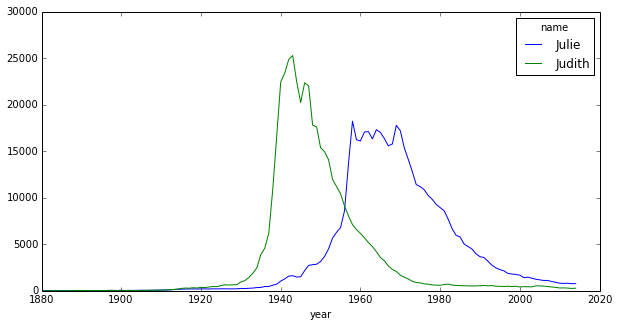

In [46]:
%matplotlib inline
subset = total_births[['Julie', 'Judith']]
subset.plot(figsize=(10, 5), grid = False)
plt.show()

#### Take spelling into account

In [40]:
# Select the names starting with Juli/July and Judi/Judy
all_names = names.name.unique()
julie_like = [i for i in all_names if re.compile(r'Jul[iy]').search(i)]
judit_like = [i for i in all_names if re.compile(r'Jud[iy]').search(i)]

In [41]:
# Select Judith like girl names
filtered_1 = names[(names.name.isin(judit_like)) & (names.sex == 'F')]
alas_1 = filtered_1.groupby('name').births.sum()
alas_1.sort('name', ascending=False)
alas_1.head()

name
Judith    451203
Judy      381474
Judi       10233
Judie       5455
Judyth       902
Name: births, dtype: int64

In [42]:
# Select Julie like girl names
filtered_2 = names[(names.name.isin(julie_like)) & (names.sex == 'F')]
alas_2 = filtered_2.groupby('name').births.sum()
alas_2.sort('name', ascending=False)
alas_2.head()

name
Julie       505875
Julia       446112
Juliana      50277
Julianna     38896
Julianne     28698
Name: births, dtype: int64

In [43]:
# Create a joined table
table = filtered_1.pivot_table('births',rows='year', aggfunc='sum')
table2 = filtered_2.pivot_table('births',rows='year', aggfunc='sum')
merged_table = pd.concat([table2, table], axis=1, join='inner')
merged_table.columns=['Julie-like', 'Judith-like']
merged_table.head()


,Julie-like,Judith-like
year,,
1880,815,10
1881,782,15
1882,849,13
1883,914,15
1884,989,24


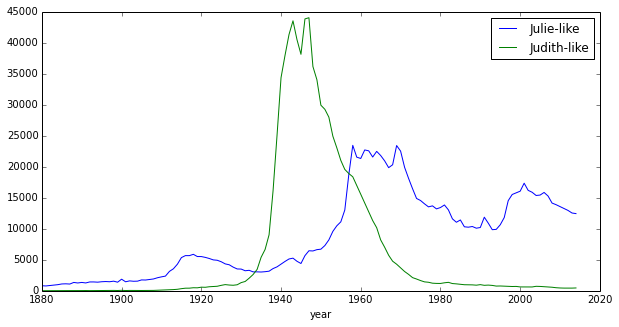

In [47]:
# Plot it
merged_table.plot(figsize=(10, 5), grid = False)
plt.show()

In [45]:
# Sum the interesting range (aka numeric integral)
merged_table.ix[1980:1995].sum(axis=0)[0]/float(merged_table.ix[1980:1995].sum(axis=0)[1])

11.049422375980726